In [2]:
import matplotlib.pyplot as plt
vert=['Cmil','Lcha','Hsap','Mmus','Ggal','Psin']
def enlevechiffre(str): 
    newstring = "".join([i for i in str if not i.isdigit()])
    return newstring.upper()

In [3]:
def Stats(file):    
    with open(file) as f,open('anomalies.txt','w') as an : 
        lines=f.readlines()
        tot=len(lines)
        dicvert={}
        dejavu={}
        current_speciesname={}
        for v in vert :
            dejavu[v]=False
            sousdic={}
            sousdic['involve']=0
            sousdic['difgenes']=0 
            sousdic['nb not found']=0
            sousdic['nb no name']=0 
            sousdic['only']=0
            dicvert[v]=sousdic
            current_speciesname[v]=[]
            sousdic['difnames_species']={}
        nbdifname={}
        current=' '
        current_name=[]
        nbasc=0
        for line in lines : 
            dicvert[line.split(' ')[1].split('|')[0]]['involve']+=1
            if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()=='notFound':
                dicvert[line.split(' ')[1].split('|')[0]]['nb not found']+=1
            if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()=='':
                dicvert[line.split(' ')[1].split('|')[0]]['nb no name']+=1
            if not(dejavu[line.split(' ')[1].split('|')[0]]): 
                dicvert[line.split(' ')[1].split('|')[0]]['difgenes']+=1
                dejavu[line.split(' ')[1].split('|')[0]]=True     
            if not(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()) in current_name) :
                if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='notFound' :
                    #print(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip())
                    if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='':
                        current_name.append(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()))
            if not(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()) in current_speciesname[line.split(' ')[1].split('|')[0]]) :
                if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='notFound' :
                    #print(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip())
                    if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='':
                        current_speciesname[line.split(' ')[1].split('|')[0]].append(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()))
            if line.split(' ')[0]!=current : 
                nbasc+=1
                current=line.split(' ')[0]
                if len(current_name) in nbdifname.keys(): 
                    nbdifname[len(current_name)]+=1
                else: 
                    nbdifname[len(current_name)]=1
                if len(current_name)>1: 
                    for name in current_name : 
                        an.write(name+"|")
                    an.write("\n")
                current_name=[]
                tr=[]
                for v in vert :
                    if dejavu[v]: 
                        tr.append(v)
                        dejavu[v]=False
                    if len(current_speciesname[v]) in dicvert[v]['difnames_species'].keys(): 
                        dicvert[v]['difnames_species'][len(current_speciesname[v])]+=1
                    else: 
                        dicvert[v]['difnames_species'][len(current_speciesname[v])]=1
                    current_speciesname[v]=[]
                if len(tr)==1:  
                    dicvert[tr[0]]['only']+=1
        #for v in vert : 
            #print(f"{v}  Part : {dicvert[v]['involve']*100/tot:.1f}%")
            #print(dicvert[v])
        #print(nbdifname)
        return dicvert,tot,nbdifname
Stats('Outputs/manToMany_vertnh.txt')

({'Cmil': {'involve': 28846,
   'difgenes': 11233,
   'nb not found': 28846,
   'nb no name': 0,
   'only': 47,
   'difnames_species': {0: 13634}},
  'Lcha': {'involve': 34596,
   'difgenes': 12029,
   'nb not found': 0,
   'nb no name': 12063,
   'only': 185,
   'difnames_species': {1: 6208,
    0: 3216,
    2: 3144,
    3: 842,
    8: 7,
    7: 39,
    4: 151,
    5: 23,
    9: 2,
    6: 2}},
  'Hsap': {'involve': 0,
   'difgenes': 0,
   'nb not found': 0,
   'nb no name': 0,
   'only': 0,
   'difnames_species': {0: 13634}},
  'Mmus': {'involve': 37708,
   'difgenes': 11906,
   'nb not found': 605,
   'nb no name': 11,
   'only': 159,
   'difnames_species': {0: 1784,
    1: 6278,
    3: 1213,
    2: 3418,
    12: 5,
    7: 115,
    6: 156,
    4: 405,
    5: 213,
    8: 30,
    11: 12,
    9: 4,
    16: 1}},
  'Ggal': {'involve': 26946,
   'difgenes': 11018,
   'nb not found': 9942,
   'nb no name': 5704,
   'only': 28,
   'difnames_species': {0: 6522, 1: 5560, 2: 1288, 4: 66, 3: 193

[15.735691780139431, 17.441648713746268, 19.190555217685603, 17.810327825480435, 14.402537117018682, 15.419239345929583]


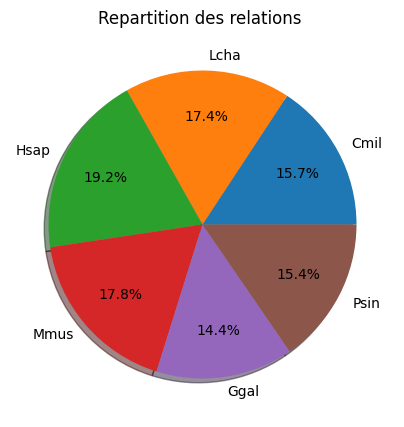

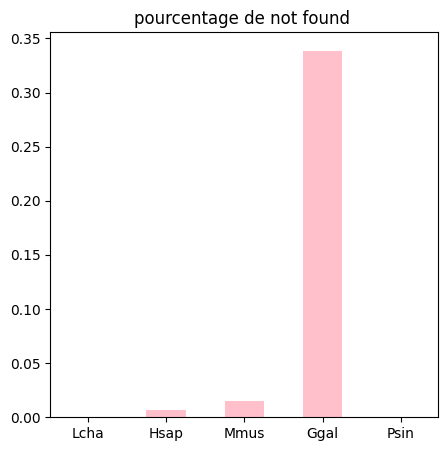

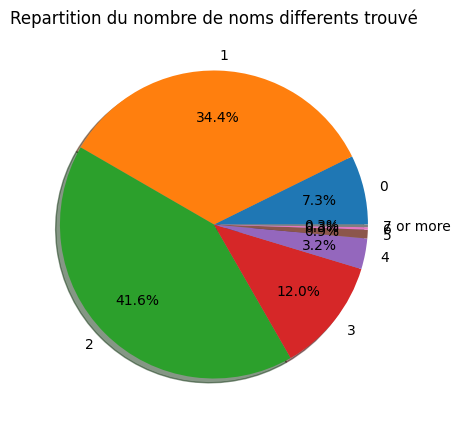

In [73]:
dicvert,tot,nbdifname=Stats('Outputs/1ToMany_all.txt')
part=[dicvert[v]['involve']*100/(tot) for v in dicvert] 
nf=[dicvert[v]['nb not found']/dicvert[v]['involve'] for v in dicvert]
print(part)
plt.figure(figsize=(5,5))
plt.pie(part, labels = vert,
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True)
plt.title('Repartition des relations ')
plt.figure(figsize=(5,5))
vertnc=[i for i in vert]
vertnc.remove('Cmil')
nf=[dicvert[v]['nb not found']/dicvert[v]['involve'] for v in vertnc]
plt.bar([i for i in range(len(vertnc))],nf,width=0.5,color='pink')
plt.xticks([i for i in range(len(vertnc))],[i for i in vertnc])
plt.title('pourcentage de not found ')
plt.figure(figsize=(5,5))
if len(nbdifname.keys())>7: 
     ndif=[nbdifname[i] for i in range(0,8)]
     for i in nbdifname:
          if i>7: 
               ndif[7]+=nbdifname[i]
     l=[str(i) for i in range(0,7)]
     l.append('7 or more')
else : 
     l=nbdifname.keys()
     ndif=[nbdifname[i] for i in nbdifname]
plt.pie(ndif, labels =l,
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True)
plt.title('Repartition du nombre de noms differents trouvé')
plt.show()
#plt.legend(loc='best')

In [74]:
dicvert['Psin']

{'involve': 44876,
 'difgenes': 25496,
 'nb not found': 0,
 'nb no name': 9222,
 'only': 746,
 'difnames_species': {0: 15134, 1: 17441, 2: 4251, 3: 660, 5: 31, 4: 88, 6: 3}}

In [41]:
dicvert_hier,tot_hier,nbdifname_hier=Stats('1To1_hier.txt')
print(dicvert_hier)

{'Cmil': {'involve': 1748, 'difgenes': 1748, 'nb not found': 1748, 'nb no name': 0, 'only': 1748, 'difnames_species': {0: 10510}}, 'Lcha': {'involve': 1870, 'difgenes': 1870, 'nb not found': 0, 'nb no name': 312, 'only': 1870, 'difnames_species': {0: 8952, 1: 1558}}, 'Hsap': {'involve': 1725, 'difgenes': 1725, 'nb not found': 1, 'nb no name': 6, 'only': 1725, 'difnames_species': {0: 8792, 1: 1718}}, 'Mmus': {'involve': 1806, 'difgenes': 1806, 'nb not found': 2, 'nb no name': 0, 'only': 1806, 'difnames_species': {0: 8706, 1: 1804}}, 'Ggal': {'involve': 1490, 'difgenes': 1490, 'nb not found': 441, 'nb no name': 352, 'only': 1490, 'difnames_species': {0: 9813, 1: 697}}, 'Psin': {'involve': 1871, 'difgenes': 1871, 'nb not found': 0, 'nb no name': 276, 'only': 1871, 'difnames_species': {1: 1595, 0: 8915}}}


In [39]:
asc=['Phmamm','Phfumi','Cisavi','Cirobu','Moocci','Moocul','Mooccu','Boschl','Boleac','Haaura','Harore']

def asciStats(file): 
    with open(file) as f,open('anomalies.txt','w') as an : 
        lines=f.readlines()
        tot=len(lines)
        dicvert={}
        dejavu={}
        current_speciesname={}
        for v in asc :
            dejavu[v]=False
            sousdic={}
            sousdic['involve']=0
            sousdic['difgenes']=0 
            sousdic['nb not found']=0
            sousdic['nb no name']=0 
            sousdic['only']=0
            dicvert[v]=sousdic
            current_speciesname[v]=[]
            sousdic['difnames_species']={}
        nbdifname={}
        current=' '
        current_name=[]
        nbasc=0
        for line in lines : 
            dicvert[line.split(' ')[0].split('|')[0]]['involve']+=1
            if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()=='notFound':
                dicvert[line.split(' ')[0].split('|')[0]]['nb not found']+=1
            if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()=='':
                dicvert[line.split(' ')[0].split('|')[0]]['nb no name']+=1
            if not(dejavu[line.split(' ')[0].split('|')[0]]): 
                dicvert[line.split(' ')[0].split('|')[0]]['difgenes']+=1
                dejavu[line.split(' ')[0].split('|')[0]]=True     
            if not(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()) in current_name) :
                if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='notFound' :
                    #print(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip())
                    if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='':
                        current_name.append(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()))
            if not(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()) in current_speciesname[line.split(' ')[0].split('|')[0]]) :
                if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='notFound' :
                    #print(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip())
                    if line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()!='':
                        current_speciesname[line.split(' ')[0].split('|')[0]].append(enlevechiffre(line.split(' ')[1].split('|')[1].split('Name::')[1].split(';')[0].strip()))
            if line.split(' ')[0]!=current : 
                nbasc+=1
                current=line.split(' ')[0]
                if len(current_name) in nbdifname.keys(): 
                    nbdifname[len(current_name)]+=1
                else: 
                    nbdifname[len(current_name)]=1
                if len(current_name)>1: 
                    for name in current_name : 
                        an.write(name+"|")
                    an.write("\n")
                current_name=[]
                tr=[]
                for v in asc :
                    if dejavu[v]: 
                        tr.append(v)
                        dejavu[v]=False
                    if len(current_speciesname[v]) in dicvert[v]['difnames_species'].keys(): 
                        dicvert[v]['difnames_species'][len(current_speciesname[v])]+=1
                    else: 
                        dicvert[v]['difnames_species'][len(current_speciesname[v])]=1
                    current_speciesname[v]=[]
                if len(tr)==1:  
                    dicvert[tr[0]]['only']+=1
        #for v in vert : 
            #print(f"{v}  Part : {dicvert[v]['involve']*100/tot:.1f}%")
            #print(dicvert[v])
        #print(nbdifname)
        return dicvert,nbasc,nbdifname

In [42]:
dic_asc,totasc,nbdifname_asc=asciStats('Outputs/1To1_vertnh.txt')
dic_asch,totasch,nbdifname_asch=asciStats('Outputs/1To1_human.txt')

In [43]:
totasch+totasc

60507

[2.3534729546481845, 3.411179749886997, 82.6487871026066, 6.457736929335543, 0.8588217568178393, 4.270001506704837]


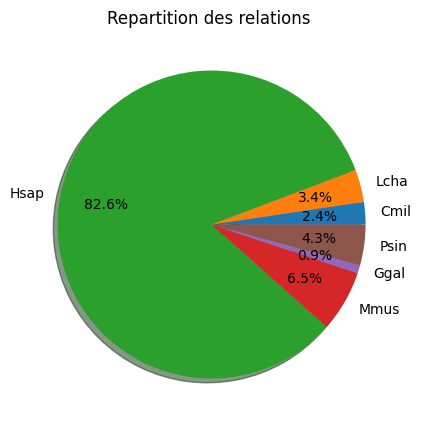

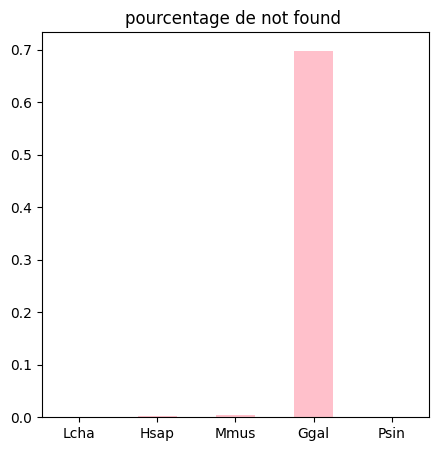

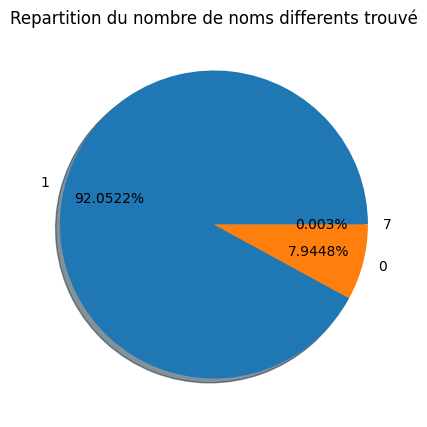

In [9]:
dicvert,tot,nbdifname=Stats('hier_1To1_all.txt')
part=[dicvert[v]['involve']*100/(tot) for v in dicvert] 
nf=[dicvert[v]['nb not found']/dicvert[v]['involve'] for v in dicvert]
print(part)
plt.figure(figsize=(5,5))
plt.pie(part, labels = vert,
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True)
plt.title('Repartition des relations ')
plt.figure(figsize=(5,5))
vertnc=[i for i in vert]
vertnc.remove('Cmil')
nf=[dicvert[v]['nb not found']/dicvert[v]['involve'] for v in vertnc]
plt.bar([i for i in range(len(vertnc))],nf,width=0.5,color='pink')
plt.xticks([i for i in range(len(vertnc))],[i for i in vertnc])
plt.title('pourcentage de not found ')
plt.figure(figsize=(5,5))
if len(nbdifname.keys())>7: 
     ndif=[nbdifname[i] for i in range(0,8)]
     for i in nbdifname:
          if i>7: 
               ndif[7]+=nbdifname[i]
     l=[str(i) for i in range(0,7)]
     l.append('7 or more')
else : 
     l=nbdifname.keys()
     ndif=[nbdifname[i] for i in nbdifname]
plt.pie(ndif, labels =l,
           autopct = lambda x: str(round(x, 4)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True)
plt.title('Repartition du nombre de noms differents trouvé')
plt.show()
#plt.legend(loc='best')

In [78]:
dicvert

{'Cmil': {'involve': 1588,
  'difgenes': 1588,
  'nb not found': 1588,
  'nb no name': 0,
  'only': 1588,
  'difnames_species': {0: 10568}},
 'Lcha': {'involve': 1754,
  'difgenes': 1754,
  'nb not found': 0,
  'nb no name': 268,
  'only': 1754,
  'difnames_species': {0: 9082, 1: 1486}},
 'Hsap': {'involve': 1999,
  'difgenes': 1999,
  'nb not found': 2,
  'nb no name': 5,
  'only': 1999,
  'difnames_species': {0: 8576, 1: 1992}},
 'Mmus': {'involve': 1874,
  'difgenes': 1874,
  'nb not found': 2,
  'nb no name': 0,
  'only': 1874,
  'difnames_species': {0: 8696, 1: 1872}},
 'Ggal': {'involve': 1485,
  'difgenes': 1485,
  'nb not found': 456,
  'nb no name': 294,
  'only': 1485,
  'difnames_species': {0: 9833, 1: 735}},
 'Psin': {'involve': 1868,
  'difgenes': 1868,
  'nb not found': 0,
  'nb no name': 324,
  'only': 1868,
  'difnames_species': {1: 1544, 0: 9024}}}

In [ ]:
'Cirobu|KH.C2.144.v1.A.ND3-2'